In [15]:
smi = []
xtb = []
am1 = []

with open("ddE.dat") as datafile:
    #skip first 4 lines
    for _ in range(4):
        datafile.readline()

    while True:
        curline = datafile.readline()
        if curline[0] == '#':
            break
        smi_mol, xtb_mol = curline.split()
        smi.append(smi_mol)
        xtb.append(float(xtb_mol))
        
    for line in datafile:
        _, am1_mol = line.split()
        am1.append(float(am1_mol))

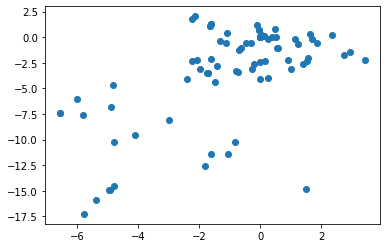

In [17]:
import matplotlib.pyplot as plt
plt.scatter(xtb, am1)
plt.show()

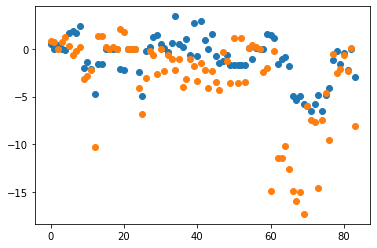

In [120]:
%matplotlib inline
r = np.arange(len(xtb))
plt.scatter(r, xtb)
plt.scatter(r, am1)
plt.show()

In [64]:
# this cell extracts the number of unique molecules, and makes an array where each element is a value
# that is the same for anyconformers of the same molecule.

confs = []

curmol = -1
prevname = "hi"

for mol in smi:
    if mol[:len(prevname)] != prevname:
        # first conformer ends in -0
        prevname = mol[:-2]
        curmol += 1
    confs.append(curmol)

In [19]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

In [27]:
paired = np.vstack((xtb, am1)).T

In [68]:
# cluster conformers by distance

cluster = AgglomerativeClustering(n_clusters=6,linkage="single")
cluster.fit(paired)

groups = {i : []  for i in np.unique(cluster.labels_)}

for i in range(len(paired)):
    groups[cluster.labels_[i]].append(smi[i])

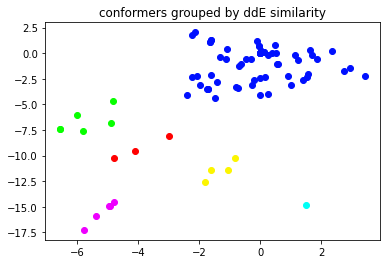

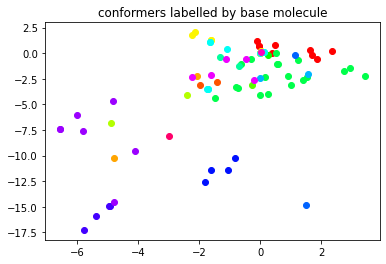

In [70]:
colors = plt.get_cmap("hsv")

for i, coord in enumerate(paired):
    groups[cluster.labels_[i]].append(smi[i])
    plt.scatter(*coord, color=colors( cluster.labels_[i]/cluster.n_clusters ))
plt.title("conformers grouped by ddE similarity")
plt.show()

for i, coord in enumerate(paired):
    plt.scatter(*coord, color=colors( confs[i]/len(np.unique(confs)) ))
plt.title("conformers labelled by base molecule")
plt.show()

In [87]:
import mpld3

<IPython.core.display.Javascript object>


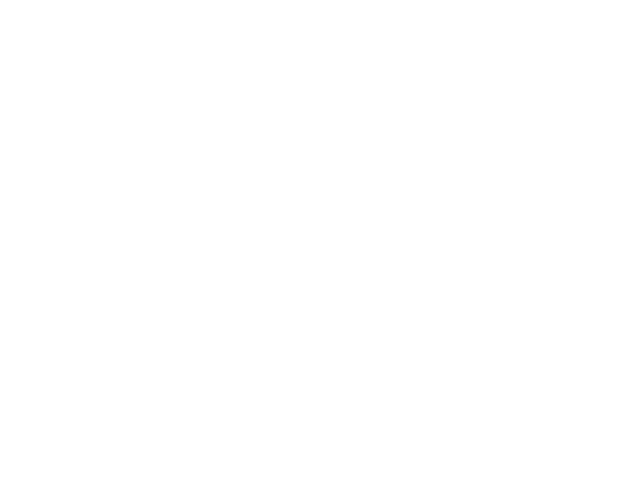

In [118]:
%matplotlib nbagg
css  ="""
table
{
  border-collapse: collapse;
}
th
{
  color: #ffffff;
  background-color: #000000;
}
td
{
  background-color: #cccccc;
}
table, th, td
{
  font-family:Arial, Helvetica, sans-serif;
  border: 1px solid black;
  text-align: right;
}
"""
fig, ax = plt.subplots()

scatter = ax.scatter(xtb, am1)

ax.set_title("Scatter Plot (with tooltips!)", size=20)

tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=smi, hoffset=10)
mpld3.plugins.connect(fig, tooltip)

mpld3.display()

In [116]:
tooltip.css()

'\ntable\n{\n  border-collapse: collapse;\n}\nth\n{\n  color: #ffffff;\n  background-color: #000000;\n}\ntd\n{\n  background-color: #cccccc;\n}\ntable, th, td\n{\n  font-family:Arial, Helvetica, sans-serif;\n  border: 1px solid black;\n  text-align: right;\n}\n'

<IPython.core.display.Javascript object>


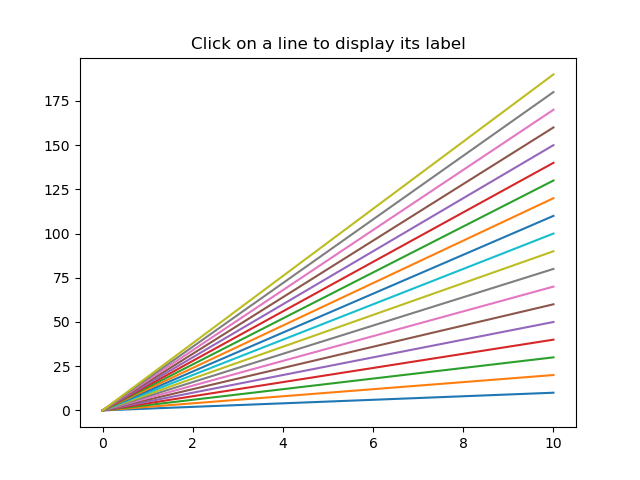

In [85]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.set_title("Click on a line to display its label")

# Plot a series of lines with increasing slopes.
for i in range(1, 20):
    ax.plot(x, i * x, label=f"$y = {i}x$")

# Use a Cursor to interactively display the label for a selected line.
mplcursors.cursor().connect(
    "add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))
mplcursors.cursor(hover=True)
plt.show()